# K nearest neighbors

KNN falls in the supervised learning family of algorithms. Informally, this means that we are given a labelled dataset consiting of training observations (x, y) and would like to capture the relationship between x and y. More formally, our goal is to learn a function h: X→Y so that given an unseen observation x, h(x) can confidently predict the corresponding output y.

In this module we will explore the inner workings of KNN, choosing the optimal K values and using KNN from scikit-learn.

## Overview

1. Read the problem statement.

2. Get the dataset.

3. Explore the dataset.

4. Pre-processing of dataset.

5. Visualization

6. Transform the dataset for building machine learning model.

7. Split data into train, test set.

8. Build Model.

9. Apply the model.

10. Evaluate the model.

11. Finding Optimal K value

12. Repeat 7, 8, 9 steps.

### Dataset

The data set we’ll be using is the Iris Flower Dataset which was first introduced in 1936 by the famous statistician Ronald Fisher and consists of 50 observations from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals.

**Download the dataset here:**
- https://www.kaggle.com/uciml/iris

**Train the KNN algorithm to be able to distinguish the species from one another given the measurements of the 4 features.**

## Load data

### Question 1

Import the data set and print 10 random rows from the data set

Hint: use **sample()** function to get random rows

In [212]:
import numpy as np
import pandas as pd
Ir= pd.read_csv('iris.csv')
Iris = pd.DataFrame(Ir)
Iris.sample(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
123,124,6.3,2.7,4.9,1.8,Iris-virginica
52,53,6.9,3.1,4.9,1.5,Iris-versicolor
145,146,6.7,3.0,5.2,2.3,Iris-virginica
69,70,5.6,2.5,3.9,1.1,Iris-versicolor
111,112,6.4,2.7,5.3,1.9,Iris-virginica
37,38,4.9,3.1,1.5,0.1,Iris-setosa
92,93,5.8,2.6,4.0,1.2,Iris-versicolor
139,140,6.9,3.1,5.4,2.1,Iris-virginica
105,106,7.6,3.0,6.6,2.1,Iris-virginica
9,10,4.9,3.1,1.5,0.1,Iris-setosa


## Data Pre-processing

### Question 2 - Estimating missing values

Its not good to remove the records having missing values all the time. We may end up loosing some data points. So, we will have to see how to replace those missing values with some estimated values (median)

Calculate the number of missing values per column
- don't use loops

In [213]:
Iris.isnull().sum()

Id               0
SepalLengthCm    1
SepalWidthCm     2
PetalLengthCm    2
PetalWidthCm     1
Species          0
dtype: int64

Fill missing values with median of that particular column

In [214]:
Temp1=Iris['SepalLengthCm'].median()
Iris['SepalLengthCm']=Iris['SepalLengthCm'].fillna(value=Temp1)
Temp2=Iris['SepalWidthCm'].median()
Iris['SepalWidthCm']=Iris['SepalWidthCm'].fillna(value=Temp2)
Temp3=Iris['PetalLengthCm'].median()
Iris['PetalLengthCm']=Iris['PetalLengthCm'].fillna(value=Temp3)
Temp4=Iris['PetalWidthCm'].median()
Iris['PetalWidthCm']=Iris['PetalWidthCm'].fillna(value=Temp4)

### Question 3 - Dealing with categorical data

Change all the classes to numericals (0 to 2)

Hint: use **LabelEncoder()**

In [215]:
from sklearn import preprocessing
LE=preprocessing.LabelEncoder()
Iris['Species']=LE.fit_transform(Iris['Species'])

### Question 4

Observe the association of each independent variable with target variable and drop variables from feature set having correlation in range -0.1 to 0.1 with target variable.

Hint: use **corr()**

In [216]:
Iris.corr()
Iris=Iris.drop(['Id'],axis=1)

### Question 5

Observe the independent variables variance and drop such variables having no variance or almost zero variance (variance < 0.1). They will be having almost no influence on the classification

Hint: use **var()**

In [217]:
Iris.var()

SepalLengthCm    0.676645
SepalWidthCm     0.185552
PetalLengthCm    3.076516
PetalWidthCm     0.577141
Species          0.675322
dtype: float64

### Question 6

Plot the scatter matrix for all the variables.

Hint: use **pandas.plotting.scatter_matrix()**

you can also use pairplot()

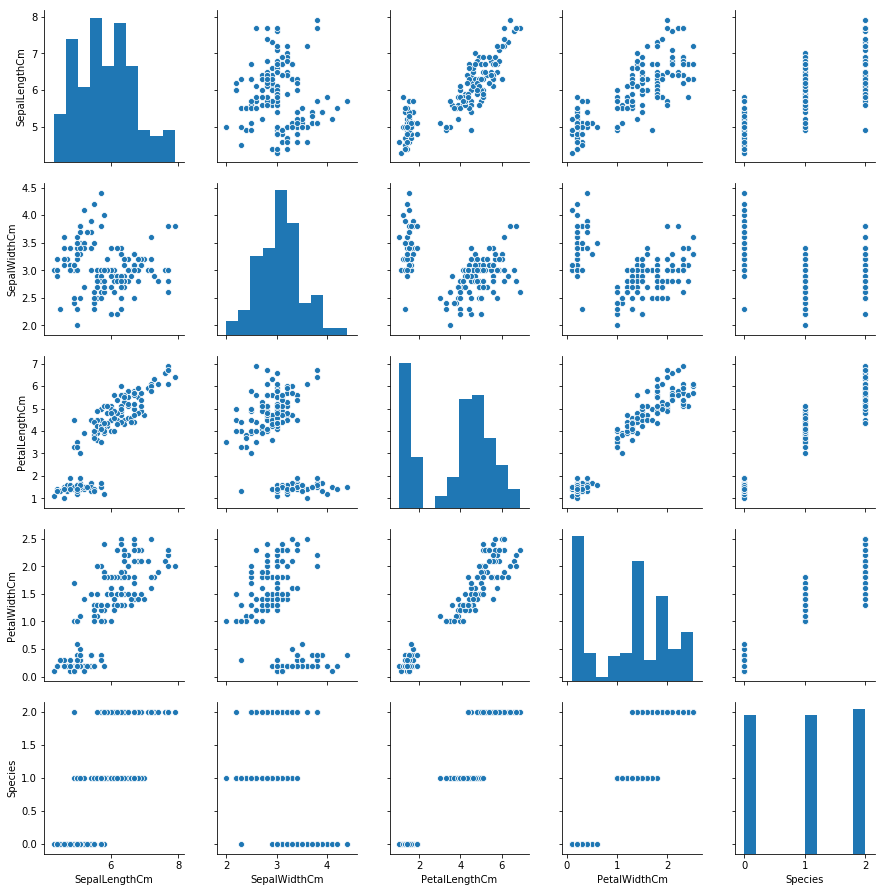

In [218]:
import seaborn as sns
import matplotlib as mpl
sns.pairplot(Iris)

## Split the dataset into training and test sets


### Question 7

Split the dataset into training and test sets with 80-20 ratio

Hint: use **train_test_split()**

In [219]:
from scipy.stats import zscore
from sklearn.preprocessing import Imputer
test_size = 0.2
x=Iris.drop(labels="Species",axis=1)
x=x.apply(zscore)
y=Iris[["Species"]]
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size)

## Build Model

### Question 8

Build the model and train and test on training and test sets respectively using **scikit-learn**.

Print the Accuracy of the model with different values of **k = 3, 5, 9**

Hint: For accuracy you can check **accuracy_score()** in scikit-learn

In [220]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn import metrics
NNH = KNeighborsClassifier(n_neighbors= 3)
NNH.fit(x_train, y_train)
predicted_labels = NNH.predict(x_test)
print("Accuracy for k=3 is ",NNH.score(x_test, y_test))

Accuracy for k=3 is  0.9032258064516129


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """


In [221]:
NNH = KNeighborsClassifier(n_neighbors= 5)
NNH.fit(x_train, y_train)
predicted_labels = NNH.predict(x_test)
print("Accuracy for k=5 is ",NNH.score(x_test, y_test))

Accuracy for k=5 is  0.9032258064516129


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


In [222]:
NNH = KNeighborsClassifier(n_neighbors= 9)
NNH.fit(x_train, y_train)
predicted_labels = NNH.predict(x_test)
print("Accuracy for k=9 is ",NNH.score(x_test, y_test))

Accuracy for k=9 is  0.8709677419354839


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


## Find optimal value of K

### Question 9 - Finding Optimal value of k

- Run the KNN with no of neighbours to be 1, 3, 5 ... 19
- Find the **optimal number of neighbours** from the above list

In [223]:
for x in range(1, 20, 2):
    NNH = KNeighborsClassifier(n_neighbors= x)
    NNH.fit(x_train, y_train)
    predicted_labels = NNH.predict(x_test)
    if x==1:
        acc=({x:NNH.score(x_test, y_test)})
    else:
        acc.update({x:NNH.score(x_test, y_test)})
print("Optimum value for k = "+str(max(acc,key=acc.get)))
print(acc)

Optimum value for k = 7
{1: 0.9032258064516129, 3: 0.9032258064516129, 5: 0.9032258064516129, 7: 0.9354838709677419, 9: 0.8709677419354839, 11: 0.9032258064516129, 13: 0.9032258064516129, 15: 0.9032258064516129, 17: 0.8709677419354839, 19: 0.8387096774193549}


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversion

## Plot accuracy

### Question 10

Plot accuracy score vs k (with k value on X-axis) using matplotlib.

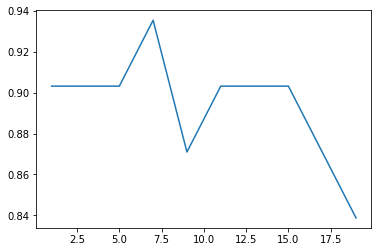

In [224]:
import matplotlib.pyplot as plt
plt.plot(acc.keys(),acc.values())

# Breast cancer dataset - OPTIONAL

## Read data

### Question 1
Read the data given in bc2.csv file

## Data preprocessing

### Question 2
Observe the no.of records in dataset and type of each column

### Question 3
Use summary statistics to check if missing values, outlier and encoding treament is necessary

Hint: use **describe()**

#### Check Missing Values

### Question 4
#### Check how many `?` are there in Bare Nuclei feature (they are also unknown or missing values). 

#### Replace them with the 'top' value of the describe function of Bare Nuclei feature

Hint: give value of parameter include='all' in describe function

### Question 5
#### Find the distribution of target variable (Class) 

#### Plot the distribution of target variable using histogram

#### Convert the datatype of Bare Nuclei to `int`

## Scatter plot

### Question 6
Plot Scatter Matrix to understand the distribution of variables and check if any variables are collinear and drop one of them.

## Train test split

### Question 7
#### Divide the dataset into feature set and target set

#### Divide the Training and Test sets in 70:30 

## Scale the data

### Question 8
Standardize the data

Hint: use **StandardScaler()**

## Build Model

### Question 9

Build the model and train and test on training and test sets respectively using **scikit-learn**.

Print the Accuracy of the model with different values of **k = 3, 5, 9**

Hint: For accuracy you can check **accuracy_score()** in scikit-learn

## Find optimal value of K

### Question 10
Finding Optimal value of k

- Run the KNN with no of neighbours to be 1, 3, 5 ... 19
- Find the **optimal number of neighbours** from the above list

## Plot accuracy

### Question 11

Plot accuracy score vs k (with k value on X-axis) using matplotlib.